In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls


data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import cv2


In [ ]:
withmask = os.listdir('/content/data/with_mask')
print(withmask[:5])
print(withmask[-5:])

['with_mask_2637.jpg', 'with_mask_2342.jpg', 'with_mask_591.jpg', 'with_mask_2448.jpg', 'with_mask_3104.jpg']
['with_mask_1080.jpg', 'with_mask_808.jpg', 'with_mask_1542.jpg', 'with_mask_408.jpg', 'with_mask_334.jpg']


In [ ]:
withoutmask = os.listdir('/content/data/without_mask')
print(withoutmask[:5])
print(withoutmask[-5:])

['without_mask_235.jpg', 'without_mask_540.jpg', 'without_mask_88.jpg', 'without_mask_3239.jpg', 'without_mask_1932.jpg']
['without_mask_3404.jpg', 'without_mask_2098.jpg', 'without_mask_1522.jpg', 'without_mask_519.jpg', 'without_mask_1285.jpg']


In [ ]:
print('Number of images with mask',len(withmask))
print('Number of images without mask',len(withoutmask))

Number of images with mask 3725
Number of images without mask 3828


In [ ]:
withmask= [1]*3725
withoutmask= [0]*3828


In [ ]:
print(withmask[:5])
print(withoutmask[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


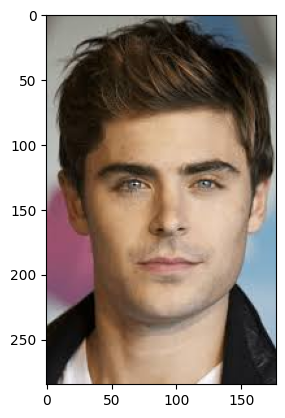

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_937.jpg')
imgplot = plt.imshow(img)
plt.show()

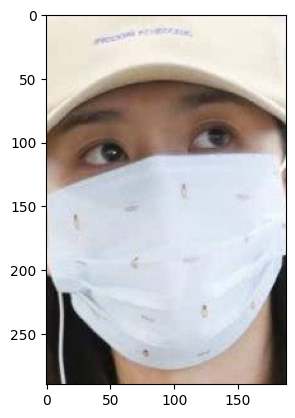

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_919.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
withmask_path = '/content/data/with_mask/'

data = []
labels = []

for img_file in withmask:
    image = Image.open(withmask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    labels.append(1)


withoutmask_path = '/content/data/without_mask/'


for img_file in withoutmask:
  image = Image.open(withoutmask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)
  labels.append(0)


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[171, 171, 171],
        [171, 171, 171],
        [171, 171, 171],
        ...,
        [172, 172, 172],
        [172, 172, 172],
        [172, 172, 172]],

       [[172, 172, 172],
        [172, 172, 172],
        [172, 172, 172],
        ...,
        [172, 172, 172],
        [172, 172, 172],
        [172, 172, 172]],

       [[173, 173, 173],
        [173, 173, 173],
        [173, 173, 173],
        ...,
        [172, 172, 172],
        [172, 172, 172],
        [172, 172, 172]],

       ...,

       [[197, 197, 197],
        [197, 197, 197],
        [197, 197, 197],
        ...,
        [ 57,  56,  87],
        [ 64,  62,  93],
        [ 67,  66,  97]],

       [[198, 198, 198],
        [198, 198, 198],
        [198, 198, 198],
        ...,
        [ 61,  60,  91],
        [ 63,  62,  93],
        [ 65,  64,  95]],

       [[198, 198, 198],
        [198, 198, 198],
        [198, 198, 198],
        ...,
        [ 69,  68,  99],
        [ 63,  62,  93],
        [ 59,  58,  89]]], dtype=uint8)
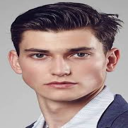

In [ ]:
data[-5]

array([[[236, 232, 222],
        [225, 221, 211],
        [212, 207, 199],
        ...,
        [172, 174, 171],
        [183, 184, 183],
        [204, 203, 207]],

       [[171, 166, 160],
        [166, 161, 156],
        [151, 146, 142],
        ...,
        [223, 225, 220],
        [226, 228, 225],
        [231, 231, 233]],

       [[143, 138, 136],
        [128, 122, 123],
        [ 94,  88,  89],
        ...,
        [234, 237, 230],
        [238, 239, 234],
        [235, 235, 233]],

       ...,

       [[102, 105, 120],
        [100, 103, 118],
        [ 97,  99, 114],
        ...,
        [238, 238, 241],
        [238, 238, 241],
        [238, 238, 239]],

       [[104, 107, 122],
        [103, 106, 121],
        [104, 107, 122],
        ...,
        [238, 238, 241],
        [238, 238, 241],
        [238, 238, 239]],

       [[113, 116, 131],
        [113, 116, 131],
        [111, 114, 129],
        ...,
        [238, 238, 241],
        [238, 238, 241],
        [238, 238, 239]]], dtype=uint8)
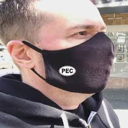

In [ ]:
data[0]

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled[0])

[[[0.84313725 0.75686275 0.6745098 ]
  [0.86666667 0.78431373 0.70196078]
  [0.8627451  0.78823529 0.70196078]
  ...
  [0.75294118 0.64313725 0.55686275]
  [0.83529412 0.7254902  0.63137255]
  [0.84313725 0.7372549  0.63529412]]

 [[0.83137255 0.75294118 0.68627451]
  [0.87058824 0.79607843 0.72941176]
  [0.87843137 0.80784314 0.74117647]
  ...
  [0.60392157 0.49411765 0.40784314]
  [0.75686275 0.64705882 0.55294118]
  [0.84313725 0.73333333 0.63137255]]

 [[0.84705882 0.77647059 0.71372549]
  [0.86666667 0.8        0.74117647]
  [0.86666667 0.79607843 0.7372549 ]
  ...
  [0.47058824 0.36862745 0.27843137]
  [0.63137255 0.52156863 0.42745098]
  [0.78431373 0.67843137 0.57647059]]

 ...

 [[0.67058824 0.1254902  0.10980392]
  [0.63921569 0.0745098  0.05490196]
  [0.67058824 0.05882353 0.04705882]
  ...
  [0.62352941 0.07058824 0.02352941]
  [0.65490196 0.07843137 0.03137255]
  [0.65882353 0.0745098  0.02352941]]

 [[0.7254902  0.14509804 0.1254902 ]
  [0.70196078 0.10588235 0.08235294]


In [ ]:
print(X_test_scaled[0])

[[[0.8745098  0.8745098  0.8745098 ]
  [0.8745098  0.8745098  0.8745098 ]
  [0.8745098  0.8745098  0.8745098 ]
  ...
  [0.8627451  0.8627451  0.8627451 ]
  [0.8627451  0.8627451  0.8627451 ]
  [0.8627451  0.8627451  0.8627451 ]]

 [[0.8745098  0.8745098  0.8745098 ]
  [0.8745098  0.8745098  0.8745098 ]
  [0.8745098  0.8745098  0.8745098 ]
  ...
  [0.8627451  0.8627451  0.8627451 ]
  [0.8627451  0.8627451  0.8627451 ]
  [0.8627451  0.8627451  0.8627451 ]]

 [[0.8745098  0.8745098  0.8745098 ]
  [0.8745098  0.8745098  0.8745098 ]
  [0.8745098  0.8745098  0.8745098 ]
  ...
  [0.8627451  0.8627451  0.8627451 ]
  [0.8627451  0.8627451  0.8627451 ]
  [0.8627451  0.8627451  0.8627451 ]]

 ...

 [[0.83921569 0.83921569 0.83137255]
  [0.83921569 0.83921569 0.83137255]
  [0.83921569 0.83921569 0.83137255]
  ...
  [0.8745098  0.8745098  0.8745098 ]
  [0.8745098  0.8745098  0.8745098 ]
  [0.8745098  0.8745098  0.8745098 ]]

 [[0.83921569 0.83921569 0.83137255]
  [0.83921569 0.83921569 0.83137255]


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
numofclass = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation ='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(numofclass,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - acc: 0.6756 - loss: 0.6757 - val_acc: 0.8942 - val_loss: 0.2483
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.8775 - loss: 0.3192 - val_acc: 0.8942 - val_loss: 0.2332
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8943 - loss: 0.2730 - val_acc: 0.9058 - val_loss: 0.1991
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9102 - loss: 0.2185 - val_acc: 0.9025 - val_loss: 0.2037
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.9155 - loss: 0.2110 - val_acc: 0.9157 - val_loss: 0.2008


In [ ]:
loss, accuracy =  model.evaluate(X_test_scaled,Y_test)
print(accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.9166 - loss: 0.2018
0.921244204044342


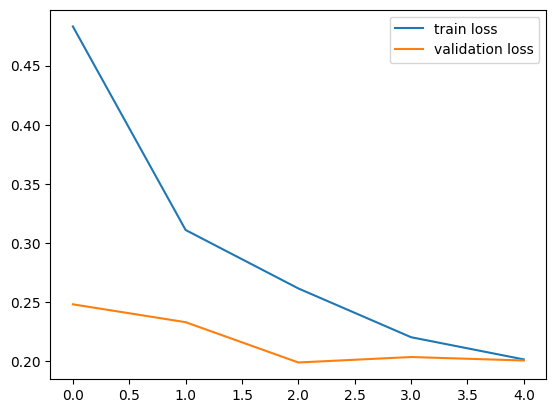

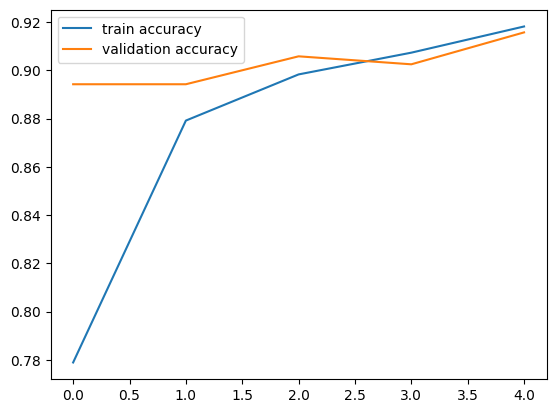

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg


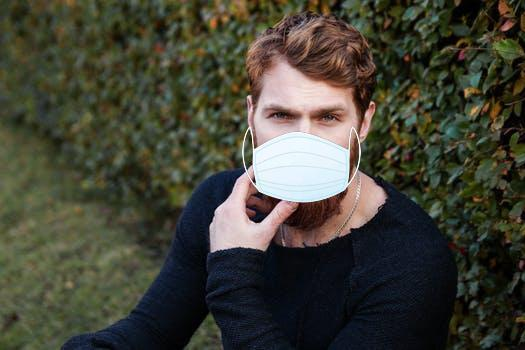

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0.50017434 0.5797126 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:


  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
import pickle

In [ ]:
filename = 'facemask_model.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open('facemask_model.sav','rb'))

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg


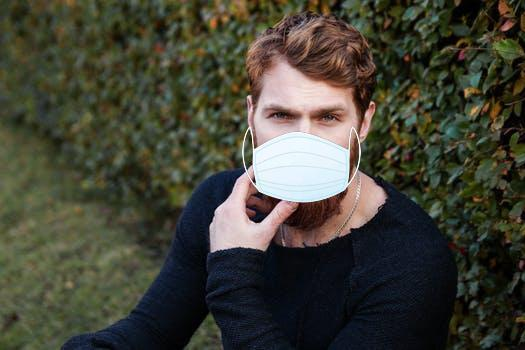

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
[[0.50017434 0.5797126 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = loaded_model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:


  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')